In [120]:
# Necesarry imports
import pandas as pd
from sklearn import svm, linear_model
from sklearn.utils import shuffle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
# settings to display all columns
pd.set_option("display.max_columns", None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
final_df = pd.read_csv("../data/final_dataset.csv")

/Users/luca/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (4,21,22,114) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
car_df = final_df[final_df["vehicleType"] == "car"]

In [5]:
car_df.head()

,id,provider,city,vehicleType,model,datetime_start,date_start,time_start,datetime_end,date_end,time_end,longitude_start,latitude_start,longitude_end,latitude_end,fuel_start,fuel_end,distance,duration,price_driving_start,price_driving_end,price_promo_start,price_promo_end,idle_duration,geometry,missing_file_number,h3_9,tier,emio,callabike,bmw 2er active tourer,bmw 2er cabrio,bmw x2,mercedes-benz gla,bmw x1,mercedes-benz a-klasse,mini 3-tuerer,mini 5-tuerer,mini cabrio,mini clubman,mini countryman,mercedes-benz b-klasse,bmw i3,smart fortwo 3rd generation,bmw 1er,nextbike,low quality vehicle,medium quality vehicle,premium quality vehicle,month,dayofweek,time_bucket,weekend,week,is_holiday,sharenow_postmerger,hex_start,hex_end,elevation_change,ascent,descent,start_d2c,end_d2c,d2c_change,d2c_direction,orig_clc,dest_clc,orig_level_1,orig_level_2,orig_level_3,dest_level_1,dest_level_2,dest_level_3,Bezirk,Bevölkerung,Alter unter 15,Alter 15 – 45,Alter 45 – 65,Alter 65 und mehr,Erwerbspersonen / Erwerbstätige,Erwerbspersonen / Erwerbslose,Nicht erwerbspersonen,Bevölkerung / Monatliches Nettoeinkommen unter 900,Bevölkerung / Monatliches Nettoeinkommen 900 – 1500,Bevölkerung / Monatliches Nettoeinkommen 1500 und mehr,Erwerbstätige / Monatliches Nettoeinkommen unter 900,Erwerbstätige / Monatliches Nettoeinkommen 900 – 1500,Erwerbstätige / Monatliches Nettoeinkommen 1500 und mehr,Rechtliche Einheiten,Sozialversicherungspflichtig Beschäftigte 2018,Umsatz 2018 (EUR),Studierende 2019,Bevölkerung mit Migrationshintergrund 2018,Ledig,Verheiratet,Geschieden,Verwitwet,Eingetr. Lebenspartnerschaft,Ohne Angabe,Eingetr. Lebenspartnerschaft aufgehoben,Eingetr. Lebenspartner/-in verstorben,Unter 18,30 - 49,65 und älter,18 - 29,50 - 64,Einheiten insgesamt,total_households,Einpersonenhaushalte (Singlehaushalte),Paare ohne Kind(er),Alleinerziehende Elternteile,Paare mit Kind(ern),Mehrpersonenhaushalte ohne Kernfamilie,temp,precipitation,shopping_start,shopping_end,food_start,food_end,health_start,health_end,transport_start,transport_end,services_start,services_end,outdoor_start,outdoor_end,leisure_and_entertainment_start,leisure_and_entertainment_end,civil_services_start,civil_services_end,h3_8,h3_7,discrete_count_9,discrete_count_8,discrete_count_7,provider_merged,provider_fleetsize_weekly
303541,ZnJlZWZsb2F0OjpjYXIyZ286OldCQTFSNTEwMDA1SzU2MjU2,car2go,berlin,car,BMW 1er,2020-01-17 11:48:08+01:00,20200117,1145,2020-01-17 12:18:08+01:00,20200117,1215,13.33342,52.52740,13.30515,52.49958,34.0,28.0,3637.190728,1800.0,NaN,NaN,NaN,NaN,2400.0,POINT (13.33342 52.5274),1.0,617540519153369087,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1,4,"[800, 1200)",False,3,False,True,891f1d48e8bffff,891f1d49c27ffff,1.050077,48.753005,47.702928,5492.121655,6596.567931,1104.446276,outbound,111,111,Artificial surfaces,Urban fabric,Continuous urban fabric,Artificial surfaces,Urban fabric,Continuous urban fabric,Mitte,372347.8,46293.2,198591.4,83948.4,43514.8,204400.0,16500.0,151400.0,89000.0,86800.0,147000.0,24900.0,52500.0,126700.0,26768.0,428283.0,100409306.0,37372.752,182200.0,212.0,54.0,19.0,5.0,3.0,0.0,3.0,0.0,23.0,87.0,25.0,114.0,45.0,294.0,212.0,151.0,28.0,9.0,12.0,12.0,7.8,False,360412.149593,566477.500999,476961.665886,548257.946739,331675.228236,381682.270991,158890.936322,231353.792340,402892.254925,862487.405692,220217.309792,124221.194049,131226.330918,187638.143837,216985.292350,166618.711053,613036919527309311,608533319906230271,2,10,50,sharenow,2761
303542,ZnJlZWZsb2F0OjpjYXIyZ286OldCQTFSNTEwMDA1SzU2MjU2,car2go,berlin,car,BMW 1er,2020-01-17 12:18:08+01:00,20200117,1215,2020-01-17 13:03:26+01:00,20200117,1300,13.30515,52.49958,13.34688,52.54953,28.0,28.0,6230.522471,2718.0,NaN,NaN,NaN,NaN,0.0,POINT (13.30515 52.49958),1.0,617540519381696511,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,1,4,"[1200, 1600)",False,3,False,True,891f1d49c27ffff,891f1d48c93ffff,-0.827583,65.970809,66.798

In [141]:
def age_class(i, name):
  car_df[f"age_{i}"] = car_df[name] / car_df["Einheiten insgesamt"]

age_class(1, "Unter 18")
age_class(2, "18 - 29")
age_class(3, "30 - 49")
age_class(4, "50 - 64")
age_class(5, "65 und älter")


/var/folders/6z/4wrrwt1921s955ylw5cdq15m0000gn/T/ipykernel_63567/1650322770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df[f"age_{i}"] = car_df[name] / car_df["Einheiten insgesamt"]


In [ ]:
income_curr = [ "Erwerbstätige / Monatliches Nettoeinkommen unter 900", "Erwerbstätige / Monatliches Nettoeinkommen 900 – 1500", "Erwerbstätige / Monatliches Nettoeinkommen 1500 und mehr"]

car_df["income_total"] = 

In [22]:
car_df.head()

,id,provider,city,vehicleType,model,datetime_start,date_start,time_start,datetime_end,date_end,time_end,longitude_start,latitude_start,longitude_end,latitude_end,fuel_start,fuel_end,distance,duration,price_driving_start,price_driving_end,price_promo_start,price_promo_end,idle_duration,geometry,missing_file_number,h3_9,tier,emio,callabike,bmw 2er active tourer,bmw 2er cabrio,bmw x2,mercedes-benz gla,bmw x1,mercedes-benz a-klasse,mini 3-tuerer,mini 5-tuerer,mini cabrio,mini clubman,mini countryman,mercedes-benz b-klasse,bmw i3,smart fortwo 3rd generation,bmw 1er,nextbike,low quality vehicle,medium quality vehicle,premium quality vehicle,month,dayofweek,time_bucket,weekend,week,is_holiday,sharenow_postmerger,hex_start,hex_end,elevation_change,ascent,descent,start_d2c,end_d2c,d2c_change,d2c_direction,orig_clc,dest_clc,orig_level_1,orig_level_2,orig_level_3,dest_level_1,dest_level_2,dest_level_3,Bezirk,Bevölkerung,Alter unter 15,Alter 15 – 45,Alter 45 – 65,Alter 65 und mehr,Erwerbspersonen / Erwerbstätige,Erwerbspersonen / Erwerbslose,Nicht erwerbspersonen,Bevölkerung / Monatliches Nettoeinkommen unter 900,Bevölkerung / Monatliches Nettoeinkommen 900 – 1500,Bevölkerung / Monatliches Nettoeinkommen 1500 und mehr,Erwerbstätige / Monatliches Nettoeinkommen unter 900,Erwerbstätige / Monatliches Nettoeinkommen 900 – 1500,Erwerbstätige / Monatliches Nettoeinkommen 1500 und mehr,Rechtliche Einheiten,Sozialversicherungspflichtig Beschäftigte 2018,Umsatz 2018 (EUR),Studierende 2019,Bevölkerung mit Migrationshintergrund 2018,Ledig,Verheiratet,Geschieden,Verwitwet,Eingetr. Lebenspartnerschaft,Ohne Angabe,Eingetr. Lebenspartnerschaft aufgehoben,Eingetr. Lebenspartner/-in verstorben,Unter 18,30 - 49,65 und älter,18 - 29,50 - 64,Einheiten insgesamt,total_households,Einpersonenhaushalte (Singlehaushalte),Paare ohne Kind(er),Alleinerziehende Elternteile,Paare mit Kind(ern),Mehrpersonenhaushalte ohne Kernfamilie,temp,precipitation,shopping_start,shopping_end,food_start,food_end,health_start,health_end,transport_start,transport_end,services_start,services_end,outdoor_start,outdoor_end,leisure_and_entertainment_start,leisure_and_entertainment_end,civil_services_start,civil_services_end,h3_8,h3_7,discrete_count_9,discrete_count_8,discrete_count_7,provider_merged,provider_fleetsize_weekly,age_1,age_2,age_3,age_4,age_5
303541,ZnJlZWZsb2F0OjpjYXIyZ286OldCQTFSNTEwMDA1SzU2MjU2,car2go,berlin,car,BMW 1er,2020-01-17 11:48:08+01:00,20200117,1145,2020-01-17 12:18:08+01:00,20200117,1215,13.33342,52.52740,13.30515,52.49958,34.0,28.0,3637.190728,1800.0,NaN,NaN,NaN,NaN,2400.0,POINT (13.33342 52.5274),1.0,617540519153369087,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1,4,"[800, 1200)",False,3,False,True,891f1d48e8bffff,891f1d49c27ffff,1.050077,48.753005,47.702928,5492.121655,6596.567931,1104.446276,outbound,111,111,Artificial surfaces,Urban fabric,Continuous urban fabric,Artificial surfaces,Urban fabric,Continuous urban fabric,Mitte,372347.8,46293.2,198591.4,83948.4,43514.8,204400.0,16500.0,151400.0,89000.0,86800.0,147000.0,24900.0,52500.0,126700.0,26768.0,428283.0,100409306.0,37372.752,182200.0,212.0,54.0,19.0,5.0,3.0,0.0,3.0,0.0,23.0,87.0,25.0,114.0,45.0,294.0,212.0,151.0,28.0,9.0,12.0,12.0,7.8,False,360412.149593,566477.500999,476961.665886,548257.946739,331675.228236,381682.270991,158890.936322,231353.792340,402892.254925,862487.405692,220217.309792,124221.194049,131226.330918,187638.143837,216985.292350,166618.711053,613036919527309311,608533319906230271,2,10,50,sharenow,2761,0.078231,0.387755,0.295918,0.153061,0.085034
303542,ZnJlZWZsb2F0OjpjYXIyZ286OldCQTFSNTEwMDA1SzU2MjU2,car2go,berlin,car,BMW 1er,2020-01-17 12:18:08+01:00,20200117,1215,2020-01-17 13:03:26+01:00,20200117,1300,13.30515,52.49958,13.34688,52.54953,28.0,28.0,6230.522471,2718.0,NaN,NaN,NaN,NaN,0.0,POINT (13.30515 52.49958),1.0,617540519381696511,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,1,4,"[1200, 1600)",Fa

In [116]:
age_columns = [f"age_{i}" for i in range(1, 6)]

fdf = car_df[[*age_columns, "model"]]

In [127]:
smart_df = fdf[fdf["model"] == "smart fortwo 3rd generation"]
non_smart_df = fdf[fdf["model"] != "smart fortwo 3rd generation"]

shuffle(smart_df)
max_class = non_smart_df["model"].value_counts().max()
smart_df = smart_df[:max_class]

fdf = pd.concat([smart_df, non_smart_df])

In [129]:
fdf["model"].value_counts()

smart fortwo 3rd generation    92032
bmw 1er                        92032
mini 5-tuerer                  91611
mini 3-tuerer                  85874
mini cabrio                    84348
Mercedes-Benz A-Klasse         75003
Mercedes-Benz GLA              70267
MINI 5-tuerer                  42514
bmw 2er active tourer          40267
MINI 3-tuerer                  39752
MINI Cabrio                    36910
bmw 2er cabrio                 32792
bmw i3                         28674
mini clubman                   28120
BMW 1er                        26149
Mercedes-Benz B-Klasse         18522
bmw x1                         18144
BMW 2er Active Tourer          14282
MINI Clubman                   11630
BMW 2er Cabrio                 11514
BMW I3                         10765
mini countryman                 7758
BMW X1                          6607
bmw x2                          5172
MINI Countryman                 3000
BMW X2                          2221
Name: model, dtype: int64

In [130]:

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

X = fdf[age_columns]
Y = fdf["model"]

# Oversample using SMOTE
sm = SMOTE(random_state=42)
x_smote, y_smote = sm.fit_resample(X, Y)


# enn = EditedNearestNeighbours()
# x_train_enn, y_train_enn = enn.fit_resample(X, Y)

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

In [137]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
clf_classes = clf.classes_

In [138]:
clf_classes

array(['BMW 1er', 'BMW 2er Active Tourer', 'BMW 2er Cabrio', 'BMW I3',
       'BMW X1', 'BMW X2', 'MINI 3-tuerer', 'MINI 5-tuerer',
       'MINI Cabrio', 'MINI Clubman', 'MINI Countryman',
       'Mercedes-Benz A-Klasse', 'Mercedes-Benz B-Klasse',
       'Mercedes-Benz GLA', 'bmw 1er', 'bmw 2er active tourer',
       'bmw 2er cabrio', 'bmw i3', 'bmw x1', 'bmw x2', 'mini 3-tuerer',
       'mini 5-tuerer', 'mini cabrio', 'mini clubman', 'mini countryman',
       'smart fortwo 3rd generation'], dtype='<U27')

In [139]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
 
# Test the classifier
y_pred = clf.predict(X_test)

In [140]:
print(classification_report(y_test,y_pred))
# print(accuracy_score(y_test,y_pred))
# print("Precision Score : ",precision_score(y_test,y_pred, 
#                                            pos_label='positive',
#                                            average='micro'))
# print("Recall Score : ",recall_score(y_test,y_pred, 
#                                            pos_label='positive',
#                                            average='micro'))

/Users/luca/mambaforge/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/luca/mambaforge/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                             precision    recall  f1-score   support

                    BMW 1er       0.04      0.00      0.00     27548
      BMW 2er Active Tourer       0.00      0.00      0.00     27533
             BMW 2er Cabrio       0.04      0.01      0.01     27746
                     BMW I3       0.03      0.00      0.00     27573
                     BMW X1       0.00      0.00      0.00     27605
                     BMW X2       0.04      0.10      0.06     27892
              MINI 3-tuerer       0.03      0.00      0.00     27460
              MINI 5-tuerer       0.00      0.00      0.00     27743
                MINI Cabrio       0.01      0.00      0.00     27585
               MINI Clubman       0.04      0.02      0.03     27810
            MINI Countryman       0.04      0.04      0.04     27530
     Mercedes-Benz A-Klasse       0.05      0.00      0.00     27606
     Mercedes-Benz B-Klasse       0.03      0.00      0.00     27812
          Mercedes-Benz GLA      

/Users/luca/mambaforge/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/luca/mambaforge/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/6z/4wrrwt1921s955ylw5cdq15m0000gn/T/ipykernel_63567/834662557.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


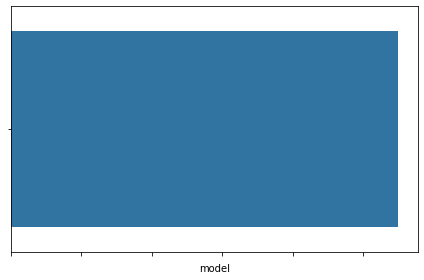

In [79]:
import seaborn as sns

ax = sns.barplot(y_train_smote.value_counts(), x="model")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [36]:
districts = car_df[["Bezirk", *age_columns]].groupby("Bezirk")

In [85]:
# Figure out and normalize data per sector
d = districts.mean()
d["total"] = d.sum(axis=1)
for c in age_columns:
  d[c] = d[c] / d["total"]
d["one"] = d[age_columns].sum(axis=1)

In [58]:
d.index

Index(['Charlottenburg-Wilmersdorf', 'Friedrichshain-Kreuzberg', 'Lichtenberg',
       'Marzahn-Hellersdorf', 'Mitte', 'Neukölln', 'Pankow', 'Reinickendorf',
       'Spandau', 'Steglitz-Zehlendorf', 'Tempelhof-Schöneberg',
       'Treptow-Köpenick'],
      dtype='object', name='Bezirk')

In [91]:
def predict_district(name: str):
  p = clf.predict_proba([d.loc[name][age_columns].values])
  i = p.argmax()
  # print(p, i)

  return clf_classes[i]

print([(on, predict_district(on)) for on in d.index])



[('Charlottenburg-Wilmersdorf', 'smart fortwo 3rd generation'), ('Friedrichshain-Kreuzberg', 'smart fortwo 3rd generation'), ('Lichtenberg', 'smart fortwo 3rd generation'), ('Marzahn-Hellersdorf', 'BMW X2'), ('Mitte', 'smart fortwo 3rd generation'), ('Neukölln', 'smart fortwo 3rd generation'), ('Pankow', 'BMW 2er Cabrio'), ('Reinickendorf', 'MINI Countryman'), ('Spandau', 'smart fortwo 3rd generation'), ('Steglitz-Zehlendorf', 'smart fortwo 3rd generation'), ('Tempelhof-Schöneberg', 'smart fortwo 3rd generation'), ('Treptow-Köpenick', 'MINI Countryman')]


/Users/luca/mambaforge/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/Users/luca/mambaforge/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/Users/luca/mambaforge/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/Users/luca/mambaforge/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/Users/luca/mambaforge/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/Users/luca/mambaforge/lib/python3.10/site-packages/sklearn/base.py:450: Us